In [298]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Arial']})
plt.rcParams['pdf.fonttype'] = 42

In [11]:
codon_table = {
'A': ('GCT', 'GCC', 'GCA', 'GCG'),
'C': ('TGT', 'TGC'),
'D': ('GAT', 'GAC'),
'E': ('GAA', 'GAG'),
'F': ('TTT', 'TTC'),
'G': ('GGT', 'GGC', 'GGA', 'GGG'),
'H': ('CAT', 'CAC'),
'I': ('ATT', 'ATC', 'ATA'),
'K': ('AAA', 'AAG'),
'L': ('TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'),
'M': ('ATG',),
'N': ('AAT', 'AAC'),
'P': ('CCT', 'CCC', 'CCA', 'CCG'),
'Q': ('CAA', 'CAG'),
'R': ('CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'),
'S': ('TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'),
'T': ('ACT', 'ACC', 'ACA', 'ACG'),
'V': ('GTT', 'GTC', 'GTA', 'GTG'),
'W': ('TGG',),
'Y': ('TAT', 'TAC'),}

In [300]:
protein=list('IYSDVFTSM')
#protein=list('GELKQNKIQ')

In [301]:
t1,t2,t3,t4,t5,t6,t7,t8,t9=[ list(codon_table[key]) for key in protein]
        
        

In [302]:
output=list(itertools.product(t1,t2,t3,t4,t5,t6,t7,t8,t9))

In [303]:
output_flat = [ ''.join(a) for a in output ]

In [59]:
def gc_content(seq):
    total=len(seq)
    gc=0
    for i in seq:
        if i == 'G' or i == 'C':
            gc+=1
    return gc/total
    

In [305]:
gc_dict={}
for seq in output_flat:
    gc_con=gc_content(seq)
    gc_dict[seq]=gc_con

In [306]:
df1=pd.DataFrame.from_dict(gc_dict,orient='index',columns=['gc_content'])

In [331]:
df1=df1.reset_index()

In [263]:
df1=df1.sort_values(by='gc_content',ascending=False)

In [264]:
df1=df1.reset_index(drop=True)

In [307]:
df1

,gc_content
ATTTATTCTGATGTTTTTACTTCTATG,0.222222
ATTTATTCTGATGTTTTTACTTCCATG,0.259259
ATTTATTCTGATGTTTTTACTTCAATG,0.222222
ATTTATTCTGATGTTTTTACTTCGATG,0.259259
ATTTATTCTGATGTTTTTACTAGTATG,0.222222
...,...
ATATACAGCGACGTGTTCACGTCCATG,0.481481
ATATACAGCGACGTGTTCACGTCAATG,0.444444
ATATACAGCGACGTGTTCACGTCGATG,0.481481
ATATACAGCGACGTGTTCACGAGTATG,0.444444


In [132]:
df1[df1['index']=='ATTTATTCTGATGTGTTTACAAGCATG']

,index,gc_content
12613,ATTTATTCTGATGTGTTTACAAGCATG,0.296296


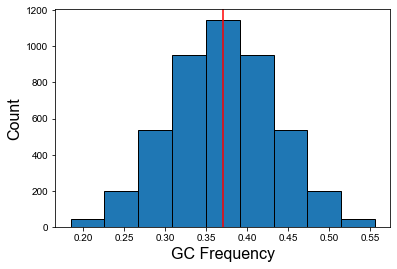

In [299]:
plt.hist(df1['gc_content'].tolist(),bins=9,edgecolor='k')
plt.axvline(0.37037, color='red')
plt.xlabel('GC Frequency',fontsize=16)
plt.ylabel('Count',fontsize=16)
#plt.savefig("seq1_hist.pdf",bbox_inches='tight',transparent=True)

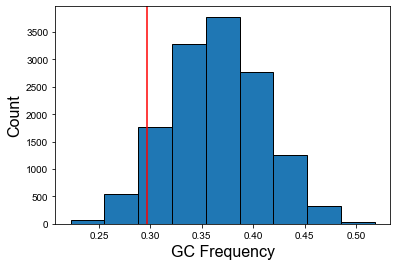

In [332]:
plt.hist(df1['gc_content'].tolist(),bins=9,edgecolor='k')
plt.axvline(0.296296, color='red')
plt.xlabel('GC Frequency',fontsize=16)
plt.ylabel('Count',fontsize=16)
#plt.savefig("seq2_hist.pdf",bbox_inches='tight',transparent=True)

In [308]:
def find_pattern(sequence):
    for i in range(0, len(sequence),6):
        sub=sequence[i:i+6]
        match1=re.findall(r'.TGA..',sequence)
        match2=re.findall(r'.TAA..',sequence)
        return (len(match1)+len(match2))

In [309]:
pattern_dict={}
for seq in output_flat:
    p=find_pattern(seq)
    pattern_dict[seq]=p
    
    

In [310]:
df2=pd.DataFrame.from_dict(pattern_dict,orient='index',columns=['pattern'])

In [218]:
df2=df2.reset_index()

In [207]:
df2

,index,pattern
0,GGTGAATTAAAACAAAATAAAATTCAA,3
1,GGTGAATTAAAACAAAATAAAATTCAG,3
2,GGTGAATTAAAACAAAATAAAATCCAA,3
3,GGTGAATTAAAACAAAATAAAATCCAG,3
4,GGTGAATTAAAACAAAATAAAATACAA,3
...,...,...
4603,GGGGAGCTGAAGCAGAACAAGATTCAG,1
4604,GGGGAGCTGAAGCAGAACAAGATCCAA,1
4605,GGGGAGCTGAAGCAGAACAAGATCCAG,1
4606,GGGGAGCTGAAGCAGAACAAGATACAA,1


(array([ 288., 2016., 2016.,  288.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

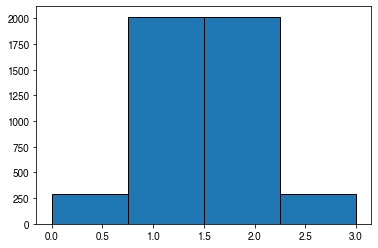

In [210]:
plt.hist(df2['pattern'].tolist(),bins=4,edgecolor='k')


In [311]:
joined=df1.join(df2)

In [255]:
from scipy.stats import pearsonr

In [313]:
data1= np.array(joined['gc_content'].tolist())
data2= np.array(joined['pattern'].tolist())

In [314]:
pearsonr(data2, data1)

(-0.25175440748900674, 8.019537959293209e-199)

In [315]:
joined=joined.sort_values(by='gc_content')

In [325]:
gc_content_count=joined.groupby(['gc_content']).count()

In [326]:
pattern_count=joined.groupby(['pattern']).count()

In [330]:
gc_content_count.to_csv('seq2_gc_counts.csv')

In [329]:
gc_content_count

,pattern
gc_content,
0.222222,72
0.259259,540
0.296296,1764
0.333333,3276
0.370370,3780
0.407407,2772
0.444444,1260
0.481481,324
0.518519,36


In [320]:
gc_content_count

,pattern
gc_content,
0.222222,0.666667
0.259259,0.577778
0.296296,0.489796
0.333333,0.402930
0.370370,0.317460
0.407407,0.233766
0.444444,0.152381
0.481481,0.074074
0.518519,0.000000
